In [131]:
import numpy as np;
import math as m;

### Generate points

In [132]:
def ExactSolutionImpl(x1, x2):
  return 2 * m.sin(10 * m.sqrt((x1 - 0.5) ** 2 + (x2 - 0.5) ** 2))

ExactSolution = np.vectorize(ExactSolutionImpl)

In [133]:
N = 1000
Lx, Ly = 2, 2
input_filename = "data/input.txt"

In [134]:
rng = np.random.default_rng(seed=42)
coords = rng.random((2, N)).T
coords[:, 0] = coords[:, 0] * Lx
coords[:, 1] = coords[:, 1] * Ly

In [135]:
values = ExactSolution(coords[:, 0], coords[:, 1])
values.shape

(1000,)

In [136]:
np.savetxt(input_filename, np.c_[coords, values], header=f"{len(values)}", comments='', fmt="%20.15lf")

### RBF interpolation

In [137]:
from scipy.interpolate import RBFInterpolator;
import matplotlib.pyplot as plt

In [138]:
Nx, Ny = 20, 20

In [139]:
input_data = np.loadtxt(input_filename, skiprows=1, dtype='float')
input_data.shape

(1000, 3)

In [140]:
coords = input_data[:, [0, 1]]
values = input_data[:, 2]

In [141]:
grid = np.mgrid[0:Lx:(Nx * 1j), 0:Ly:(Ny * 1j)].reshape(2, -1).T
grid.shape

(400, 2)

In [142]:
grid_result = RBFInterpolator(coords, values)(grid)
grid_result.shape

(400,)

In [143]:
errors = abs(ExactSolution(grid[:, 0], grid[:, 1]) - grid_result)
print("min:", min(errors), "max:", max(errors), "mean:", sum(errors) / len(errors));

min: 4.887014319887584e-06 max: 0.7557297627987205 mean: 0.029158777689516868


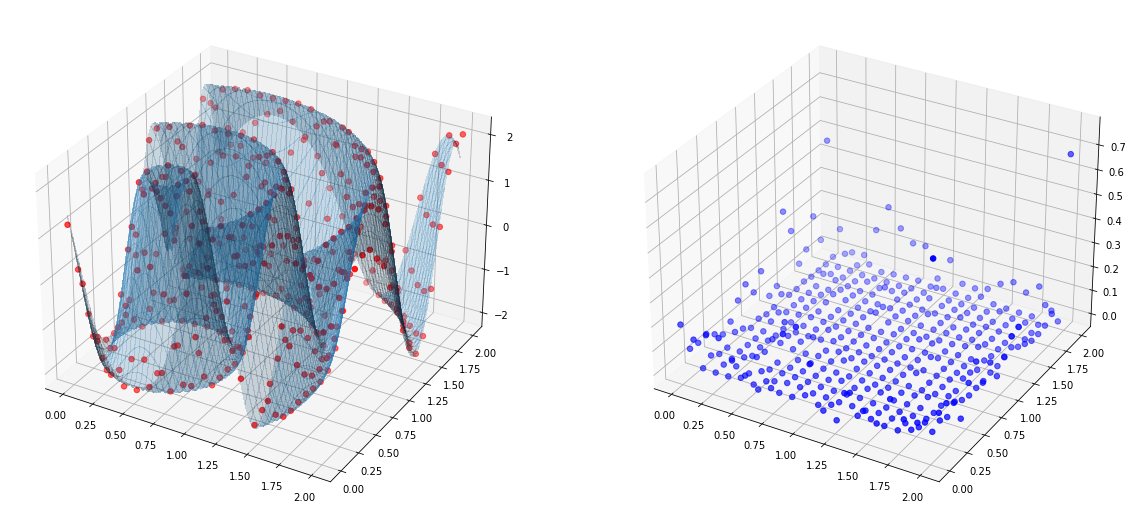

In [144]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(projection='3d'))

ax1.scatter3D(grid[:, 0], grid[:, 1], grid_result, s=30, c='red', label='result')
X, Y = np.meshgrid(np.arange(0, Lx, 0.01), np.arange(0, Ly, 0.01))
ax1.plot_surface(X, Y, ExactSolution(X, Y), alpha=0.2,
                       linewidth=0, antialiased=False)

ax2.scatter3D(grid[:, 0], grid[:, 1], errors, s=30, c='blue', label='errors')

plt.show()

### RBF interpolation with neighbors

In [170]:
k = 170

In [171]:
grid_result = RBFInterpolator(coords, values, neighbors=k)(grid)
grid_result.shape

(400,)

In [172]:
knn_errors = abs(ExactSolution(grid[:, 0], grid[:, 1]) - grid_result)
print("min:", min(knn_errors), "max:", max(knn_errors), "mean:", sum(knn_errors) / len(knn_errors));

min: 4.846991359164221e-06 max: 0.750390374098274 mean: 0.0287009794976832


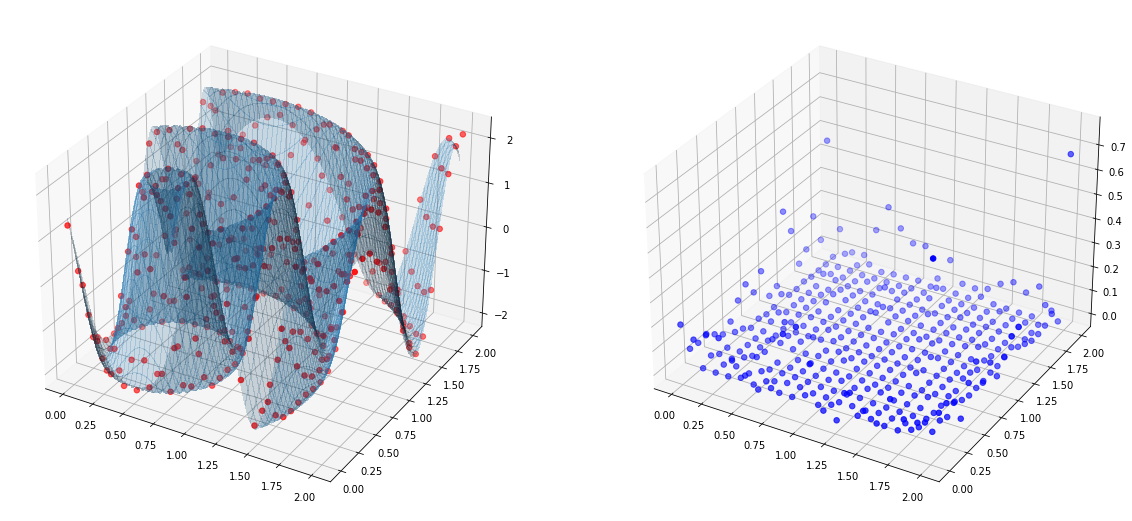

In [173]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), subplot_kw=dict(projection='3d'))

ax1.scatter3D(grid[:, 0], grid[:, 1], grid_result, s=30, c='red', label='result')
X, Y = np.meshgrid(np.arange(0, Lx, 0.01), np.arange(0, Ly, 0.01))
ax1.plot_surface(X, Y, ExactSolution(X, Y), alpha=0.2,
                       linewidth=0, antialiased=False)

ax2.scatter3D(grid[:, 0], grid[:, 1], errors, s=30, c='blue', label='errors')

plt.show()